In [93]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-notebook')
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import src.scrubbing as scrubbing
import src.evaluation as evalu
from src.roc import plot_roc

In [46]:
df = pd.read_csv('data/Restaurant_Scores_-_LIVES_Standard.csv')

In [47]:
df7 = scrubbing.scrub_all(df)

/home/soong/galv/capstone/SFeaters/src/scrubbing.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_viol['short_violation_id'] = L_vid
/home/soong/galv/capstone/SFeaters/src/scrubbing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['inspect_date'] = pd.to_datetime(df.inspection_date)
/home/soong/galv/capstone/SFeaters/src/scrubbing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

## Find out the total number of restaurants in the SF health inspection report

In [48]:
df7.head(1)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,0,11


In [49]:
f1034 = df7['business_address'].unique()

In [50]:
len(list(f1034))

4358

## Modeling: logistic regression and gradient boosting

In [177]:
y = df7['y_label']
X = df7[['p10_12', 'p13_18', 'p19_24', 'p25_36', '94013', '94014', '94080', '94101', '94102', '94103', '94104',
       '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114',
       '94115', '94116', '94117', '94118', '94120', '94121', '94122', '94123',
       '94124', '94127', '94129', '94130', '94131', '94132', '94133', '94134',
       '94143', '94158']]

In [178]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

### Let's stash X_test and y_test away for only test set purpose. Split X_train and y_train again for train and validation.

In [179]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.25, random_state=28)

In [180]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [181]:
log_model.coef_

array([[-0.35559827,  0.01954942,  0.20886761,  0.08386524, -0.52650552,
        -0.48990932,  0.        ,  0.42310768,  0.02006984,  0.55577285,
         1.2869633 , -0.30644431, -0.04131389,  0.03161384,  0.62459175,
         1.52459705, -0.16720855,  0.46675473,  0.9403458 , -1.37798398,
         0.18306156, -0.53377899,  0.13927229,  0.        , -0.08925677,
         0.46055029,  1.28669253, -0.31189219,  0.4755737 ,  0.        ,
        -0.66980407,  0.19914285,  1.62859709,  0.46221792,  0.14321426,
         0.39764732, -0.94190598]])

In [182]:
log_model.intercept_

array([-0.2168155])

In [183]:
log_model.score(X_validation, y_validation)

0.6912599318955732

# Gradient Boosting Model

In [184]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))

Learning rate:  0.05
Accuracy score (training): 0.606
Accuracy score (validation): 0.579
Learning rate:  0.1
Accuracy score (training): 0.637
Accuracy score (validation): 0.608
Learning rate:  0.25
Accuracy score (training): 0.679
Accuracy score (validation): 0.661
Learning rate:  0.5
Accuracy score (training): 0.691
Accuracy score (validation): 0.686
Learning rate:  0.75
Accuracy score (training): 0.699
Accuracy score (validation): 0.696
Learning rate:  1
Accuracy score (training): 0.702
Accuracy score (validation): 0.704


In [185]:
# Let's use learning rate of 0.75
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
# The "validation" here is a correct term. It is not a "test" set.

Accuracy score (training): 0.699
Accuracy score (validation): 0.696


### Cofusion matrix

In [186]:
y_predictions = gb.predict(X_test)

In [187]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()

In [188]:
print("True Negative: {}".format(tn))
print("True Positive: {}".format(tp))
print("False Negative: {}".format(fn))
print("False Positive: {}".format(fp))

True Negative: 225
True Positive: 583
False Negative: 97
False Positive: 270


In [189]:
#y = int(y.values == True)
ay = y[:]
ay = 1*y.values

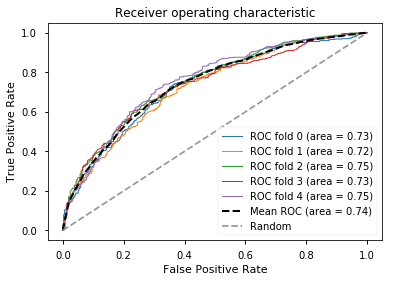

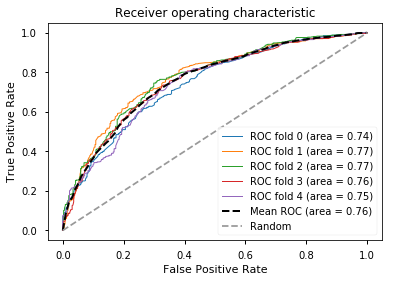


Plotting completed.


In [191]:
plot_roc(X, ay, LogisticRegression)
plot_roc(X, ay, GradientBoostingClassifier)
# plot_roc(X, y, MultinomialNB) error
print('\nPlotting completed.')

### Plotting Methods

In [192]:
def plot_roc(y_test, X_test, model, model_name):
    AUC = roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(model_name))
    plt.legend(loc="lower right");

In [193]:
def plot_profit_curve(scoring, profit_matrix, num_points=100):
    x_threshold, y_profit = scoring.profit_curve(num_points=num_points, profit_matrix=profit_matrix)
    
    fig, ax = plt.subplots()
    ax.plot(x_threshold, y_profit)
    
    ymax = max(y_profit)
    xpos = y_profit.index(ymax)
    xmax = x_threshold[xpos]
    
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=180,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction", arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    #ax.set_ylim(min(y_profit), ymax*2)
    ax.set_ylim(min(y_profit), ymax*1.7)
    ax.set_xlabel('Threshold For Predicting Inspection Fail')
    ax.set_ylabel('Profit')
    ax.set_title('Profit Curve')
    plt.show()

## Profit curve

In [194]:
scoring = evalu.Scores(model=gb, X_test=X_test, y_test=y_test)
scoring.scores()

Accuracy: 0.6876595744680851
Precision 0.6834701055099648
Recall 0.8573529411764705
F1 0.7606001304631441


In [195]:
# customer, investment on facility/training, fine by the city
customer = 100
investment = 5
fine = 100

false_pos = (-1) * investment
true_pos  = (-1) * fine
false_neg = customer - fine
true_neg  = customer - investment

profit_matrix = [[true_neg, false_pos],[false_neg, true_pos]]

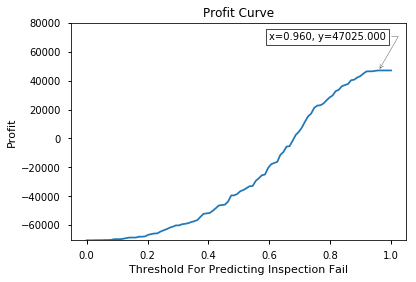

In [196]:
plot_profit_curve(scoring, profit_matrix, num_points=100)